In [3]:

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.max_rows = 1000
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(r'/content/df_itog.csv')

In [4]:
k = df[df['Регион'] != 'Республика Ингушетия']

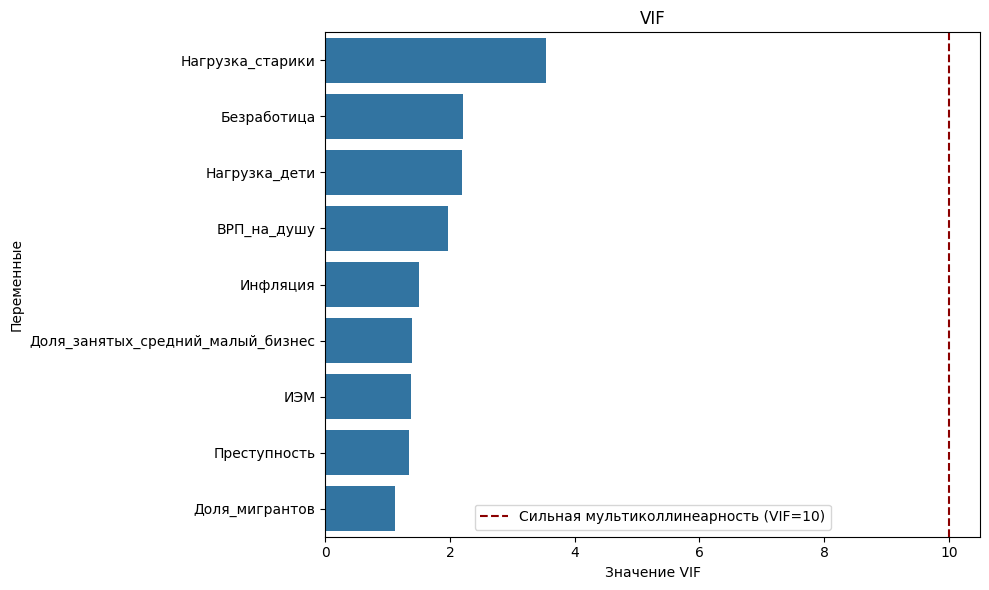

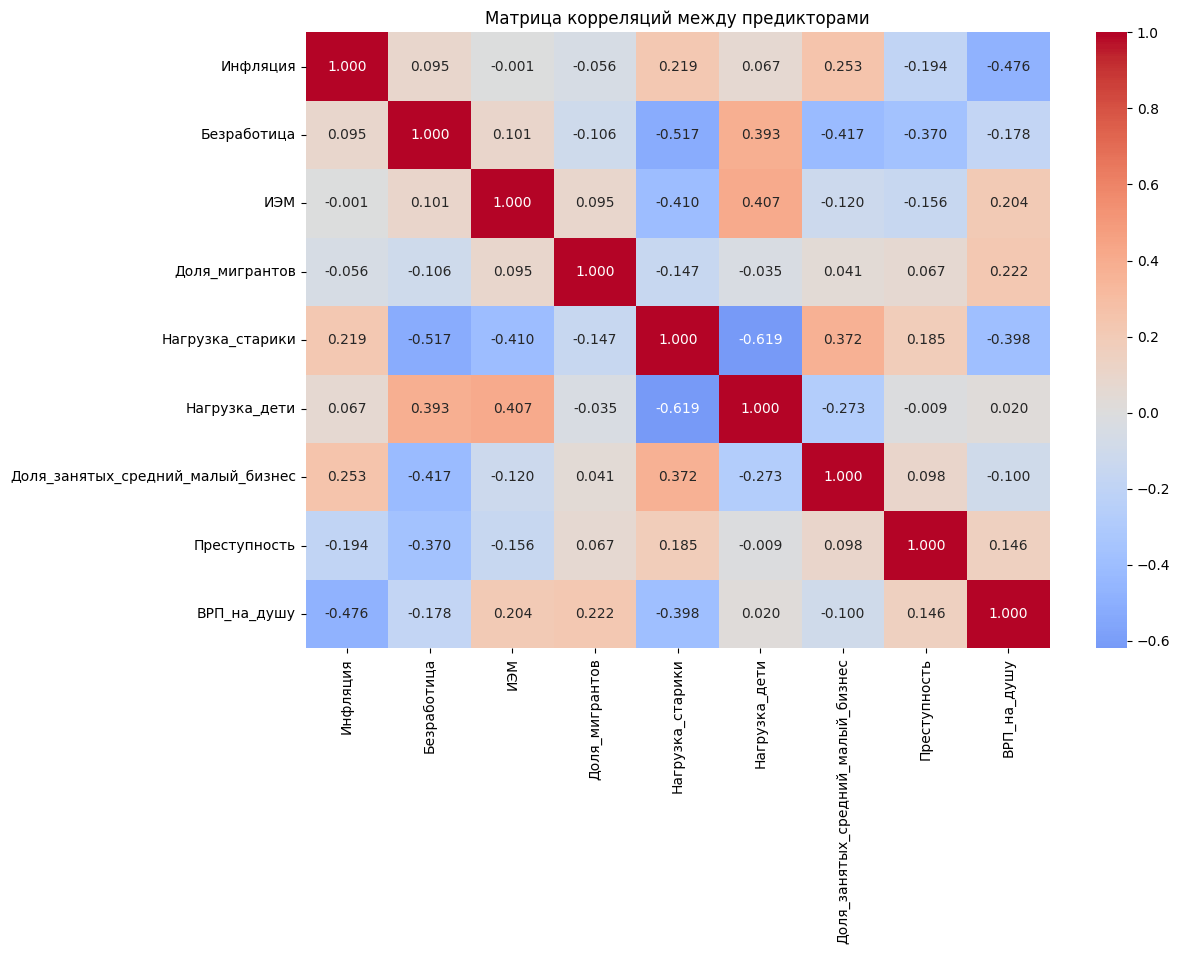

Таблица VIF:
                       Переменная      VIF
                 Нагрузка_старики 3.543985
                      Безработица 2.205648
                    Нагрузка_дети 2.193303
                      ВРП_на_душу 1.960373
                         Инфляция 1.510899
Доля_занятых_средний_малый_бизнес 1.385913
                              ИЭМ 1.369169
                     Преступность 1.338840
                   Доля_мигрантов 1.113698
                                   Инфляция  Безработица    ИЭМ  \
Инфляция                              1.000        0.095 -0.001   
Безработица                           0.095        1.000  0.101   
ИЭМ                                  -0.001        0.101  1.000   
Доля_мигрантов                       -0.056       -0.106  0.095   
Нагрузка_старики                      0.219       -0.517 -0.410   
Нагрузка_дети                         0.067        0.393  0.407   
Доля_занятых_средний_малый_бизнес     0.253       -0.417 -0.120   
Преступность         

In [5]:

formula = "Стандартное_отклонение_Берт ~ Инфляция + Безработица + ИЭМ + Доля_мигрантов + Нагрузка_старики + Нагрузка_дети + Доля_занятых_средний_малый_бизнес + Преступность + ВРП_на_душу"
model = sm.OLS.from_formula(formula, data=df).fit()
variables = model.model.exog
vif_data = pd.DataFrame()
vif_data["Переменная"] = model.model.exog_names[1:]
vif_data["VIF"] = [variance_inflation_factor(variables, i) for i in range(1, variables.shape[1])]
plt.figure(figsize=(10, 6))
sns.barplot(x='VIF', y='Переменная', data=vif_data.sort_values('VIF', ascending=False))
plt.axvline(x=10, color='darkred', linestyle='--', label='Сильная мультиколлинеарность (VIF=10)')
plt.title('VIF')
plt.xlabel('Значение VIF')
plt.ylabel('Переменные')
plt.legend()
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 8))
corr_matrix = df[vif_data["Переменная"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".3f")
plt.title('Матрица корреляций между предикторами')
plt.show()
print("Таблица VIF:")
print(vif_data.sort_values('VIF', ascending=False).to_string(index=False))
print(corr_matrix.round(3))
print(model)

In [5]:
m01 = ols("Стандартное_отклонение ~ Инфляция + Безработица +"
"ИЭМ + Доля_мигрантов + Нагрузка_старики + Нагрузка_дети + Доля_занятых_средний_малый_бизнес + Преступность + ВРП_на_душу "

, data = df).fit()
print(m01.summary())
print(summary_col(m01, stars=True, float_format='%.3f'))

                              OLS Regression Results                              
Dep. Variable:     Стандартное_отклонение   R-squared:                       0.316
Model:                                OLS   Adj. R-squared:                  0.231
Method:                     Least Squares   F-statistic:                     3.697
Date:                    Wed, 25 Jun 2025   Prob (F-statistic):           0.000751
Time:                            18:11:40   Log-Likelihood:                 108.79
No. Observations:                      82   AIC:                            -197.6
Df Residuals:                          72   BIC:                            -173.5
Df Model:                               9                                         
Covariance Type:                nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [6]:
m01 = ols("Стандартное_отклонение_Берт ~ Инфляция + Безработица +"
"ИЭМ + Доля_мигрантов + Нагрузка_старики + Нагрузка_дети + Доля_занятых_средний_малый_бизнес + Преступность + ВРП_на_душу "

, data = df).fit()
print(m01.summary())
print(summary_col(m01, stars=True, float_format='%.3f'))

                                 OLS Regression Results                                
Dep. Variable:     Стандартное_отклонение_Берт   R-squared:                       0.048
Model:                                     OLS   Adj. R-squared:                 -0.071
Method:                          Least Squares   F-statistic:                    0.4003
Date:                         Wed, 25 Jun 2025   Prob (F-statistic):              0.931
Time:                                 18:12:07   Log-Likelihood:                 116.85
No. Observations:                           82   AIC:                            -213.7
Df Residuals:                               72   BIC:                            -189.6
Df Model:                                    9                                         
Covariance Type:                     nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------

In [8]:
m01 = ols("Стандартное_отклонение_Берт ~ Безработица +"
"Доля_мигрантов "

, data = df).fit()
print(m01.summary())
print(summary_col(m01, stars=True, float_format='%.3f'))

                                 OLS Regression Results                                
Dep. Variable:     Стандартное_отклонение_Берт   R-squared:                       0.033
Model:                                     OLS   Adj. R-squared:                  0.009
Method:                          Least Squares   F-statistic:                     1.351
Date:                         Wed, 25 Jun 2025   Prob (F-statistic):              0.265
Time:                                 18:12:53   Log-Likelihood:                 116.23
No. Observations:                           82   AIC:                            -226.5
Df Residuals:                               79   BIC:                            -219.2
Df Model:                                    2                                         
Covariance Type:                     nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [9]:
m01 = ols("Тональность ~ Инфляция + Безработица +"
"ИЭМ + Доля_мигрантов + Нагрузка_старики + Нагрузка_дети + Доля_занятых_средний_малый_бизнес + Преступность + ВРП_на_душу "

, data = df).fit()
print(m01.summary())
print(summary_col(m01, stars=True, float_format='%.3f'))

                            OLS Regression Results                            
Dep. Variable:            Тональность   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     1.383
Date:                Wed, 25 Jun 2025   Prob (F-statistic):              0.212
Time:                        18:13:09   Log-Likelihood:                 93.945
No. Observations:                  82   AIC:                            -167.9
Df Residuals:                      72   BIC:                            -143.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [10]:
m01 = ols("Тональность ~ Безработица +"
" Доля_мигрантов "

, data = df).fit()
print(m01.summary())
print(summary_col(m01, stars=True, float_format='%.3f'))

                            OLS Regression Results                            
Dep. Variable:            Тональность   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     3.383
Date:                Wed, 25 Jun 2025   Prob (F-statistic):             0.0389
Time:                        18:13:46   Log-Likelihood:                 90.775
No. Observations:                  82   AIC:                            -175.5
Df Residuals:                      79   BIC:                            -168.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.2440      0.015    -16.

In [11]:
m01 = ols("Доля_негативных ~ Безработица +"
"Доля_мигрантов "

, data = df).fit()
print(m01.summary())
print(summary_col(m01, stars=True, float_format='%.3f'))

                            OLS Regression Results                            
Dep. Variable:        Доля_негативных   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     4.273
Date:                Wed, 25 Jun 2025   Prob (F-statistic):             0.0173
Time:                        18:14:24   Log-Likelihood:                 61.747
No. Observations:                  82   AIC:                            -117.5
Df Residuals:                      79   BIC:                            -110.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.7429      0.021     34.

In [13]:
m01 = ols("Тональность_Берт ~  Безработица +"
" Доля_мигрантов "

, data = k).fit()
print(m01.summary())
print(summary_col(m01, stars=True, float_format='%.3f'))

                            OLS Regression Results                            
Dep. Variable:       Тональность_Берт   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                    0.2458
Date:                Wed, 25 Jun 2025   Prob (F-statistic):              0.783
Time:                        18:15:34   Log-Likelihood:                 54.548
No. Observations:                  81   AIC:                            -103.1
Df Residuals:                      78   BIC:                            -95.91
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.2223      0.028      7.

In [15]:
m01 = ols("Доля_негативных ~ Безработица +"
"Доля_мигрантов"
#+ Нагрузка_старики + Нагрузка_дети + Доля_занятых_средний_малый_бизнес + Преступность + ВРП_на_душу "

, data = k).fit()
print(m01.summary())
print(summary_col(m01, stars=True, float_format='%.3f'))

                            OLS Regression Results                            
Dep. Variable:        Доля_негативных   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.487
Date:                Wed, 25 Jun 2025   Prob (F-statistic):              0.232
Time:                        18:16:33   Log-Likelihood:                 60.499
No. Observations:                  81   AIC:                            -115.0
Df Residuals:                      78   BIC:                            -107.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.7421      0.026     28.

In [16]:
m01 = ols("Тональность_Берт ~ Инфляция + Безработица +"
"ИЭМ + Доля_мигрантов + Нагрузка_старики + Нагрузка_дети + Доля_занятых_средний_малый_бизнес + Преступность + ВРП_на_душу "

, data = df).fit()
print(m01.summary())
print(summary_col(m01, stars=True, float_format='%.3f'))

                            OLS Regression Results                            
Dep. Variable:       Тональность_Берт   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     1.245
Date:                Wed, 25 Jun 2025   Prob (F-statistic):              0.282
Time:                        18:17:01   Log-Likelihood:                 60.378
No. Observations:                  82   AIC:                            -100.8
Df Residuals:                      72   BIC:                            -76.69
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [18]:
m01 = ols("Тональность_Берт ~ Безработица +"
"Доля_мигрантов"
# + Нагрузка_старики + Нагрузка_дети + Доля_занятых_средний_малый_бизнес + Преступность + ВРП_на_душу "

, data = df).fit()
print(m01.summary())
print(summary_col(m01, stars=True, float_format='%.3f'))

                            OLS Regression Results                            
Dep. Variable:       Тональность_Берт   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.233
Date:                Wed, 25 Jun 2025   Prob (F-statistic):              0.297
Time:                        18:17:53   Log-Likelihood:                 55.709
No. Observations:                  82   AIC:                            -105.4
Df Residuals:                      79   BIC:                            -98.20
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.2197      0.023      9.

In [19]:
m01 = ols("Доля_негативных ~ Инфляция + Безработица +"
"ИЭМ + Доля_мигрантов + Нагрузка_старики + Нагрузка_дети + Доля_занятых_средний_малый_бизнес + Преступность + ВРП_на_душу "

, data = df).fit()
print(m01.summary())
print(summary_col(m01, stars=True, float_format='%.3f'))

                            OLS Regression Results                            
Dep. Variable:        Доля_негативных   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     1.479
Date:                Wed, 25 Jun 2025   Prob (F-statistic):              0.172
Time:                        18:18:13   Log-Likelihood:                 64.491
No. Observations:                  82   AIC:                            -109.0
Df Residuals:                      72   BIC:                            -84.92
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [21]:
m01 = ols("Доля_негативных  ~  Безработица"
# + Нагрузка_старики + Нагрузка_дети + Доля_занятых_средний_малый_бизнес + Преступность + ВРП_на_душу "

, data = df).fit()
print(m01.summary())
print(summary_col(m01, stars=True, float_format='%.3f'))

                            OLS Regression Results                            
Dep. Variable:        Доля_негативных   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     7.521
Date:                Wed, 25 Jun 2025   Prob (F-statistic):            0.00752
Time:                        18:19:46   Log-Likelihood:                 61.220
No. Observations:                  82   AIC:                            -118.4
Df Residuals:                      80   BIC:                            -113.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.7296      0.017     43.606      

In [22]:
m01 = ols("Доля_негативных  ~  Безработица"
# + Нагрузка_старики + Нагрузка_дети + Доля_занятых_средний_малый_бизнес + Преступность + ВРП_на_душу "

, data = k).fit()
print(m01.summary())
print(summary_col(m01, stars=True, float_format='%.3f'))

                            OLS Regression Results                            
Dep. Variable:        Доля_негативных   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.962
Date:                Wed, 25 Jun 2025   Prob (F-statistic):              0.165
Time:                        18:20:12   Log-Likelihood:                 59.977
No. Observations:                  81   AIC:                            -116.0
Df Residuals:                      79   BIC:                            -111.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.7290      0.022     32.579      

In [23]:
m01 = ols("Доля_негативных_Берт ~ Инфляция + Безработица +"
"ИЭМ + Доля_мигрантов + Нагрузка_старики + Нагрузка_дети + Доля_занятых_средний_малый_бизнес + Преступность + ВРП_на_душу "

, data = df).fit()
print(m01.summary())
print(summary_col(m01, stars=True, float_format='%.3f'))

                             OLS Regression Results                             
Dep. Variable:     Доля_негативных_Берт   R-squared:                       0.137
Model:                              OLS   Adj. R-squared:                  0.029
Method:                   Least Squares   F-statistic:                     1.271
Date:                  Wed, 25 Jun 2025   Prob (F-statistic):              0.268
Time:                          18:20:52   Log-Likelihood:                -324.83
No. Observations:                    82   AIC:                             669.7
Df Residuals:                        72   BIC:                             693.7
Df Model:                             9                                         
Covariance Type:              nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [6]:
m01 = ols("Доля_негативных_Берт ~  Безработица "
#"ИЭМ + Доля_мигрантов + Нагрузка_старики + Нагрузка_дети + Доля_занятых_средний_малый_бизнес + Преступность + ВРП_на_душу "

, data = df).fit()
print(m01.summary())
print(summary_col(m01, stars=True, float_format='%.3f'))

                             OLS Regression Results                             
Dep. Variable:     Доля_негативных_Берт   R-squared:                       0.026
Model:                              OLS   Adj. R-squared:                  0.014
Method:                   Least Squares   F-statistic:                     2.177
Date:                  Wed, 25 Jun 2025   Prob (F-statistic):              0.144
Time:                          20:01:37   Log-Likelihood:                -329.78
No. Observations:                    82   AIC:                             663.6
Df Residuals:                        80   BIC:                             668.4
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      78.1729      1.